# NYC Cabs

New York. The city that never sleeps. New York is one of the world's busiest cities. Many tourists, business man, and new yorkers use cabs as central means of transportation. Although the yellow cabs are a central building block of the cities image and self-representation, many (digital) competitors entered the competive arena. Frequently, competitors such as UBER do not only offer a cheaper ride, but also offer a new mobility experience using apps and other digital companion services. 

Thus, the different NYC cab companies have teamed up and decided to build a new digital app, with which potential customers can order a cab and also get a prediction for the ride's price to be paid. 

Now, it is up to you to build such a prediction system for the NYC cab companies. In this initial part, you will start on the data engineering part and some exploratory data analysis. In a second part, after module 3, you will engage in the prediction part. For this assignment, we will use original historic data. Due to the size of the data set we will work with 0.2% of January's 2016 data as well as weather and holiday data for that time.

# 1) Read in data

Read in the three datasets with pandas.

In [163]:
import pandas as pd

# when online, use data from github
weather=pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/00_Onboarding/03_NYCabs/weather_assignment.csv")
holidays=pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/00_Onboarding/03_NYCabs/usHolidays.csv")
rides=pd.read_csv("https://raw.githubusercontent.com/casbdai/notebooks2023/main/Module3/00_Onboarding/03_NYCabs/rides_jan2016_assignment.csv")

# to use local data
# weather=pd.read_csv("data/weather_assignment.csv")
# holidays=pd.read_csv("data/usHolidays.csv")
# rides=pd.read_csv("data/rides_jan2016_assignment.csv")

# 2) Prepare weather data

### 2.1) Inspect data

Inspect the weather date using the .head() and .info() methods. 

In [164]:
weather.head()

,temp,fog,rain,snow,conds,vis,date
0,5.6,0,0,0,Overcast,16.1,01-01-16 0:51
1,5.0,0,0,0,Overcast,16.1,01-01-16 1:51
2,5.0,0,0,0,Overcast,16.1,01-01-16 2:51
3,5.0,0,0,0,Overcast,16.1,01-01-16 3:51
4,4.4,0,0,0,Overcast,16.1,01-01-16 4:51


In [165]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10444 entries, 0 to 10443
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    10444 non-null  float64
 1   fog     10444 non-null  int64  
 2   rain    10444 non-null  int64  
 3   snow    10444 non-null  int64  
 4   conds   10444 non-null  object 
 5   vis     10204 non-null  float64
 6   date    10444 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 571.3+ KB


What can we see this that?

1. Have a look at the different date formats ( .info() ). Most variables are measured as integer and floats (Can you remember the difference?). This is good - they reflect numeric measurements.
2. The features "conds" (condition) and "vis" (visibility) have no nice names - we need to fix that
3. The features "conds" and "date" are objects, that is, they are recognized as strings (text). This is ok for "conds". But we need to transform "date" from an object to a "datetime" - we need to tell pyhton that this is a measurement of time 
4. Have a look at the "date" feature: Weather is measured at hourly rate.

###  2.2) Fix date object

Pandas provides a very easy approach to transforming dates into "datetime" format - the correct format for date and tiems. We apply the .to_datetime() function to our variable. Remember that this is a function and not a method. Methods are directly called on a dataframe (e.g., weather.head() ). Functions have to be applied to a dataframe from pandas (e.g., pd.to_datetime() )

In [166]:
weather["date"] = pd.to_datetime(weather["date"])

In [167]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10444 entries, 0 to 10443
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    10444 non-null  float64       
 1   fog     10444 non-null  int64         
 2   rain    10444 non-null  int64         
 3   snow    10444 non-null  int64         
 4   conds   10444 non-null  object        
 5   vis     10204 non-null  float64       
 6   date    10444 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 571.3+ KB


In [168]:
weather.head()

,temp,fog,rain,snow,conds,vis,date
0,5.6,0,0,0,Overcast,16.1,2016-01-01 00:51:00
1,5.0,0,0,0,Overcast,16.1,2016-01-01 01:51:00
2,5.0,0,0,0,Overcast,16.1,2016-01-01 02:51:00
3,5.0,0,0,0,Overcast,16.1,2016-01-01 03:51:00
4,4.4,0,0,0,Overcast,16.1,2016-01-01 04:51:00


We new "date" feature contains a date-part and time-part. We are only interested in the date-part and create a new feature "DATE" using the .dt.normalize() method

In [169]:
weather["DATE"]=weather["date"].dt.normalize()
weather.head()

,temp,fog,rain,snow,conds,vis,date,DATE
0,5.6,0,0,0,Overcast,16.1,2016-01-01 00:51:00,2016-01-01
1,5.0,0,0,0,Overcast,16.1,2016-01-01 01:51:00,2016-01-01
2,5.0,0,0,0,Overcast,16.1,2016-01-01 02:51:00,2016-01-01
3,5.0,0,0,0,Overcast,16.1,2016-01-01 03:51:00,2016-01-01
4,4.4,0,0,0,Overcast,16.1,2016-01-01 04:51:00,2016-01-01


### 2.3) Please rename the features "vis" and "conds" into "visibility" and "conditions"

In [170]:
weather = weather.rename(columns={"vis": "visibility", "conds": "conditions"})
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10444 entries, 0 to 10443
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        10444 non-null  float64       
 1   fog         10444 non-null  int64         
 2   rain        10444 non-null  int64         
 3   snow        10444 non-null  int64         
 4   conditions  10444 non-null  object        
 5   visibility  10204 non-null  float64       
 6   date        10444 non-null  datetime64[ns]
 7   DATE        10444 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 652.9+ KB


# 3) Prepare rides data

### 3.1) Investigate the rides dataframe 

In [171]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VendorID             5000 non-null   object 
 1   pickup_datetime      5000 non-null   object 
 2   passenger_count      5000 non-null   int64  
 3   trip_distance_miles  5000 non-null   float64
 4   pickup_longitude     5000 non-null   float64
 5   pickup_latitude      5000 non-null   float64
 6   RatecodeID           5000 non-null   object 
 7   dropoff_longitude    5000 non-null   float64
 8   dropoff_latitude     5000 non-null   float64
 9   payment_type         5000 non-null   object 
 10  total_amount         5000 non-null   float64
 11  pickup_hour          5000 non-null   int64  
 12  pickup_timeOfDay     5000 non-null   object 
 13  trip_distance        5000 non-null   float64
 14  trip_duration        5000 non-null   int64  
 15  speed                5000 non-null   f

In [172]:
rides.head()

,VendorID,pickup_datetime,passenger_count,trip_distance_miles,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,total_amount,pickup_hour,pickup_timeOfDay,trip_distance,trip_duration,speed
0,VeriFone Inc.,2016-01-07T05:41:17Z,1,1.24,-73.954620,40.778168,Standard rate,-73.966461,40.789097,Credit card,11.30,7,morning,1.995582,768,5.812500
1,VeriFone Inc.,2016-01-07T11:51:22Z,1,0.56,-73.973160,40.762642,Standard rate,-73.982422,40.766708,Credit card,6.36,13,afternoon,0.901230,250,8.064000
2,"Creative Mobile Technologies, LLC",2016-01-09T21:10:11Z,2,2.80,-73.991508,40.759918,Standard rate,-73.979385,40.732933,Credit card,15.95,23,evening,4.506152,876,11.506849
3,"Creative Mobile Technologies, LLC",2016-01-05T19:28:46Z,1,1.50,-73.992607,40.745228,Standard rate,-73.976349,40.732452,Credit card,10.55,21,evening,2.414010,527,10.246679
4,VeriFone Inc.,2016-01-04T18:36:23Z,2,1.95,-73.977104,40.755554,Standard rate,-73.959152,40.777596,Cash,9.30,20,evening,3.138213,417,16.834532


The datetime has a time zone indicated (see the Z trailing the date and time "2016-01-04T18:36:23Z"). Here we have UTC time. As the other data does not have timezones we can remove this information. Otherwise, we would have needed to align the timezones.

In [173]:
rides["pickup_datetime"] = pd.to_datetime(rides["pickup_datetime"]).dt.normalize().dt.tz_localize(None)

### 3.2) Fix the date object (again)

Have a look at the feature "pickup_datetime" - yet another format for time. Let's transform that to pandas' standard datetime with pd.to_datetime()

**Note:** format of `pickup_datetime` was set in the previous cell, otherwise the `dt` methods don't work.

In [174]:
# rides[____] = pd.____(____[____])

Extract the date part only

In [175]:
# rides["pickup_datetime"] = rides["pickup_datetime"].____.____
rides["pickup_datetime"]

0      2016-01-07
1      2016-01-07
2      2016-01-09
3      2016-01-05
4      2016-01-04
          ...    
4995   2016-01-22
4996   2016-01-14
4997   2016-01-06
4998   2016-01-02
4999   2016-01-17
Name: pickup_datetime, Length: 5000, dtype: datetime64[ns]

# 4) Prepare the holidays dataframe

### 4.1) Inspect the holidays dataframe

In [176]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    90 non-null     int64 
 1   Date     90 non-null     object
 2   Holiday  90 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


In [177]:
holidays.head()

,Index,Date,Holiday
0,1,02/01/2012,New Year Day
1,2,16/01/2012,Martin Luther King Jr. Day
2,3,20/02/2012,Presidents Day (Washingtons Birthday)
3,4,28/05/2012,Memorial Day
4,5,04/07/2012,Independence Day


### 4.2) Remove the feature "Index". We don't need that. Remove that feature from the data frame

In [178]:
del(holidays["Index"])

### 4.3) And again, a different format for dates. Fix it!

In [179]:
holidays["Date"]=pd.to_datetime(holidays["Date"]).dt.normalize()

holidays.head()

/tmp/ipykernel_138712/4240092311.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  holidays["Date"]=pd.to_datetime(holidays["Date"]).dt.normalize()


,Date,Holiday
0,2012-02-01,New Year Day
1,2012-01-16,Martin Luther King Jr. Day
2,2012-02-20,Presidents Day (Washingtons Birthday)
3,2012-05-28,Memorial Day
4,2012-04-07,Independence Day


The command may generate a warning, because pandas fails to parse the format automatically. You can ignore it (not generally, but in this case)

# 5) Merge rides and holidays

Let's merge together the three data frames on the date variable. However, these dataframes can get messy real fast. Take a look at below merge.

In [180]:
pd.merge(rides, 
         holidays, 
         how="inner", 
         left_on="pickup_datetime", 
         right_on="Date")

,VendorID,pickup_datetime,passenger_count,trip_distance_miles,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,total_amount,pickup_hour,pickup_timeOfDay,trip_distance,trip_duration,speed,Date,Holiday
0,VeriFone Inc.,2016-01-18,1,19.33,-73.989098,40.776932,Newark,-74.178627,40.690201,Credit card,100.00,15,afternoon,31.108542,2156,32.276438,2016-01-18,Martin Luther King Jr. Day
1,"Creative Mobile Technologies, LLC",2016-01-18,1,3.50,-73.991867,40.725887,Standard rate,-73.991783,40.764507,Credit card,17.15,3,night,5.632690,759,16.600791,2016-01-18,Martin Luther King Jr. Day
2,"Creative Mobile Technologies, LLC",2016-01-18,1,5.20,-73.984650,40.748341,Standard rate,-73.953629,40.806885,Credit card,21.35,21,evening,8.368568,969,19.318885,2016-01-18,Martin Luther King Jr. Day
3,VeriFone Inc.,2016-01-18,2,1.08,-73.972603,40.753571,Standard rate,-73.961899,40.766972,Cash,6.80,14,afternoon,1.738087,303,12.831683,2016-01-18,Martin Luther King Jr. Day
4,"Creative Mobile Technologies, LLC",2016-01-18,1,1.50,-73.977386,40.755417,Standard rate,-73.963631,40.774303,Cash,7.80,19,evening,2.414010,387,13.953488,2016-01-18,Martin Luther King Jr. Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,"Creative Mobile Technologies, LLC",2016-01-18,1,0.90,-73.993439,40.733177,Standard rate,-73.992279,40.743637,Credit card,8.15,15,afternoon,1.448406,373,8.686327,2016-01-18,Martin Luther King Jr. Day
162,VeriFone Inc.,2016-01-01,1,1.08,-73.969757,40.763031,Standard rate,-73.984650,40.762878,Credit card,9.12,1,night,1.738087,361,10.770083,2016-01-01,New Year Day
163,"Creative Mobile Technologies, LLC",2016-01-01,1,2.00,-73.990265,40.719105,Standard rate,-73.997566,40.720982,Credit card,20.15,1,night,3.218680,1414,5.091938,2016-01-01,New Year Day
164,VeriFone Inc.,2016-01-01,6,3.39,-74.001389,40.730984,Standard rate,-73.984207,40.759823,Credit card,14.30,1,night,5.455663,789,15.467681,2016-01-01,New Year Day


If we work with date features usually the dates are used as index values. In pandas that is, the row names (0 to 4 on the left side in the following table) 

In [181]:
rides.head()

,VendorID,pickup_datetime,passenger_count,trip_distance_miles,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,total_amount,pickup_hour,pickup_timeOfDay,trip_distance,trip_duration,speed
0,VeriFone Inc.,2016-01-07,1,1.24,-73.954620,40.778168,Standard rate,-73.966461,40.789097,Credit card,11.30,7,morning,1.995582,768,5.812500
1,VeriFone Inc.,2016-01-07,1,0.56,-73.973160,40.762642,Standard rate,-73.982422,40.766708,Credit card,6.36,13,afternoon,0.901230,250,8.064000
2,"Creative Mobile Technologies, LLC",2016-01-09,2,2.80,-73.991508,40.759918,Standard rate,-73.979385,40.732933,Credit card,15.95,23,evening,4.506152,876,11.506849
3,"Creative Mobile Technologies, LLC",2016-01-05,1,1.50,-73.992607,40.745228,Standard rate,-73.976349,40.732452,Credit card,10.55,21,evening,2.414010,527,10.246679
4,VeriFone Inc.,2016-01-04,2,1.95,-73.977104,40.755554,Standard rate,-73.959152,40.777596,Cash,9.30,20,evening,3.138213,417,16.834532


We have to rename the index / row names. We can do that with the .set_index() method of pandas. In the following example, we rename the index from a number, e.g., 0 to 4, to the pickup_datetime.

In [182]:
rides.set_index(rides["pickup_datetime"], inplace=True)
rides.head()

,VendorID,pickup_datetime,passenger_count,trip_distance_miles,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,total_amount,pickup_hour,pickup_timeOfDay,trip_distance,trip_duration,speed
pickup_datetime,,,,,,,,,,,,,,,,
2016-01-07,VeriFone Inc.,2016-01-07,1,1.24,-73.954620,40.778168,Standard rate,-73.966461,40.789097,Credit card,11.30,7,morning,1.995582,768,5.812500
2016-01-07,VeriFone Inc.,2016-01-07,1,0.56,-73.973160,40.762642,Standard rate,-73.982422,40.766708,Credit card,6.36,13,afternoon,0.901230,250,8.064000
2016-01-09,"Creative Mobile Technologies, LLC",2016-01-09,2,2.80,-73.991508,40.759918,Standard rate,-73.979385,40.732933,Credit card,15.95,23,evening,4.506152,876,11.506849
2016-01-05,"Creative Mobile Technologies, LLC",2016-01-05,1,1.50,-73.992607,40.745228,Standard rate,-73.976349,40.732452,Credit card,10.55,21,evening,2.414010,527,10.246679
2016-01-04,VeriFone Inc.,2016-01-04,2,1.95,-73.977104,40.755554,Standard rate,-73.959152,40.777596,Cash,9.30,20,evening,3.138213,417,16.834532


Lets repeat that for the holidays dataframe.

In [183]:
holidays.set_index(holidays["Date"], inplace=True)
holidays.head()

,Date,Holiday
Date,,
2012-02-01,2012-02-01,New Year Day
2012-01-16,2012-01-16,Martin Luther King Jr. Day
2012-02-20,2012-02-20,Presidents Day (Washingtons Birthday)
2012-05-28,2012-05-28,Memorial Day
2012-04-07,2012-04-07,Independence Day


Now, we can use the index to merge instead of specifying the column name. Also, we need a left join because we want to add the holidays to the single rides. That is, we want to know whether a given ride was undertaken on holiday or on a regular day.

In [184]:
rides_merged = pd.merge(rides, 
                         holidays, 
                         how="left", 
                         left_index=True, 
                         right_index=True)

Let's check weather merge was successful

In [185]:
rides_merged.head()

,VendorID,pickup_datetime,passenger_count,trip_distance_miles,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,total_amount,pickup_hour,pickup_timeOfDay,trip_distance,trip_duration,speed,Date,Holiday
2016-01-01,VeriFone Inc.,2016-01-01,1,1.08,-73.969757,40.763031,Standard rate,-73.984650,40.762878,Credit card,9.12,1,night,1.738087,361,10.770083,2016-01-01,New Year Day
2016-01-01,"Creative Mobile Technologies, LLC",2016-01-01,1,2.00,-73.990265,40.719105,Standard rate,-73.997566,40.720982,Credit card,20.15,1,night,3.218680,1414,5.091938,2016-01-01,New Year Day
2016-01-01,VeriFone Inc.,2016-01-01,6,3.39,-74.001389,40.730984,Standard rate,-73.984207,40.759823,Credit card,14.30,1,night,5.455663,789,15.467681,2016-01-01,New Year Day
2016-01-01,VeriFone Inc.,2016-01-01,1,4.85,-73.939339,40.848400,Standard rate,-73.890343,40.822430,Credit card,16.80,1,night,7.805299,626,27.891374,2016-01-01,New Year Day
2016-01-02,VeriFone Inc.,2016-01-02,5,3.13,-74.013733,40.704681,Standard rate,-74.005646,40.740986,Credit card,15.36,18,afternoon,5.037234,711,15.848101,NaT,NaN


In the dataframe "rides_merged", we can now delete the two date features "pickup_datetime" and "date". The data is redundant and the have the date information already in the newly created index. 

### 5.1) Remove old date variables "pickup_datetime" and "Date". They are not needed anymore. The new index resembles the date information.

In [186]:
del(rides_merged["pickup_datetime"])
rides_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2016-01-01 to 2016-01-31
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   VendorID             5000 non-null   object        
 1   passenger_count      5000 non-null   int64         
 2   trip_distance_miles  5000 non-null   float64       
 3   pickup_longitude     5000 non-null   float64       
 4   pickup_latitude      5000 non-null   float64       
 5   RatecodeID           5000 non-null   object        
 6   dropoff_longitude    5000 non-null   float64       
 7   dropoff_latitude     5000 non-null   float64       
 8   payment_type         5000 non-null   object        
 9   total_amount         5000 non-null   float64       
 10  pickup_hour          5000 non-null   int64         
 11  pickup_timeOfDay     5000 non-null   object        
 12  trip_distance        5000 non-null   float64       
 13  trip_duration  

The feature "Holiday" has a lot of missing values. Let's have a look at the 10 first instances

### 5.2) Impute missing values in the "Holiday" variable

In [187]:
rides_merged["Holiday"].head(10)

2016-01-01    New Year Day
2016-01-01    New Year Day
2016-01-01    New Year Day
2016-01-01    New Year Day
2016-01-02             NaN
2016-01-02             NaN
2016-01-02             NaN
2016-01-02             NaN
2016-01-02             NaN
2016-01-02             NaN
Name: Holiday, dtype: object

Let's fill the missing values with the expression "Regular Day"

In [188]:
rides_merged["Holiday"]=rides_merged["Holiday"].fillna(value="Regular Day")
rides_merged["Holiday"].head(10)

2016-01-01    New Year Day
2016-01-01    New Year Day
2016-01-01    New Year Day
2016-01-01    New Year Day
2016-01-02     Regular Day
2016-01-02     Regular Day
2016-01-02     Regular Day
2016-01-02     Regular Day
2016-01-02     Regular Day
2016-01-02     Regular Day
Name: Holiday, dtype: object

# 6) Merge rides_merged and weather data 

### 6.1) Aggregate weather data from hourly to daily level

Let's reinspect the weather data frame

In [189]:
weather.head()

,temp,fog,rain,snow,conditions,visibility,date,DATE
0,5.6,0,0,0,Overcast,16.1,2016-01-01 00:51:00,2016-01-01
1,5.0,0,0,0,Overcast,16.1,2016-01-01 01:51:00,2016-01-01
2,5.0,0,0,0,Overcast,16.1,2016-01-01 02:51:00,2016-01-01
3,5.0,0,0,0,Overcast,16.1,2016-01-01 03:51:00,2016-01-01
4,4.4,0,0,0,Overcast,16.1,2016-01-01 04:51:00,2016-01-01


Ok. Weather data is measured on a hourly level. In order to facilate things, we aggregate the weather data on the daily level, that is, the take the average for each calender day. 

In [190]:
weather_daily = weather.groupby("DATE").mean()
weather_daily.head()

/tmp/ipykernel_138712/433307765.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_daily = weather.groupby("DATE").mean()


,temp,fog,rain,snow,visibility
DATE,,,,,
2016-01-01,3.766667,0.0,0.0,0.0,16.1
2016-01-02,2.087500,0.0,0.0,0.0,16.1
2016-01-03,3.775000,0.0,0.0,0.0,16.1
2016-01-04,-2.445455,0.0,0.0,0.0,16.1
2016-01-05,-5.886364,0.0,0.0,0.0,16.1


Now, we have daily averages. Note that the features "date" and "conditions" have been removed (because the mean cannot be applied to these variables). Also, the index values have already been set to the "DATE" values that we have been using for grouping! 

### 6.2) Let's merge the aggregated dataframe "weather_daily" to "rides_merged". Please use the correct merge (inner, left, etc.) and explore whether the merge was successful.

In [191]:
rides_merged = pd.merge(rides_merged,
                        weather_daily,
                        how='left',
                        left_index = True,
                        right_index = True)
# drop the "Date" feature left over from the merge of "weather_daily", as its redundant
del(rides_merged["Date"])

rides_merged.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2016-01-01 to 2016-01-31
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VendorID             5000 non-null   object 
 1   passenger_count      5000 non-null   int64  
 2   trip_distance_miles  5000 non-null   float64
 3   pickup_longitude     5000 non-null   float64
 4   pickup_latitude      5000 non-null   float64
 5   RatecodeID           5000 non-null   object 
 6   dropoff_longitude    5000 non-null   float64
 7   dropoff_latitude     5000 non-null   float64
 8   payment_type         5000 non-null   object 
 9   total_amount         5000 non-null   float64
 10  pickup_hour          5000 non-null   int64  
 11  pickup_timeOfDay     5000 non-null   object 
 12  trip_distance        5000 non-null   float64
 13  trip_duration        5000 non-null   int64  
 14  speed                5000 non-null   float64
 15  Holiday             

### Woohoo! We are done. Everything is merged together!

# 7) Exploratory data analysis

### 7.1) Get all all taxi rides with a price of more than 100 USD!

In [192]:
rides_merged.loc[rides_merged["total_amount"]> 100]

,VendorID,passenger_count,trip_distance_miles,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,total_amount,...,pickup_timeOfDay,trip_distance,trip_duration,speed,Holiday,temp,fog,rain,snow,visibility
2016-01-07,"Creative Mobile Technologies, LLC",1,17.40,-73.982422,40.755676,Newark,-74.177223,40.695187,Credit card,102.35,...,morning,28.002516,2107,29.729473,Regular Day,4.417857,0.0,0.0,0.000000,16.100000
2016-01-13,"Creative Mobile Technologies, LLC",2,19.40,-73.873230,40.774151,Nassau or Westchester,-73.587708,40.723930,Credit card,102.95,...,morning,31.221196,3825,18.258824,Regular Day,-3.925000,0.0,0.0,0.000000,16.100000
2016-01-15,"Creative Mobile Technologies, LLC",1,23.80,-73.975983,40.746605,Negotiated fare,-73.711754,40.683640,Credit card,130.30,...,evening,38.302292,2599,32.966526,Regular Day,6.254167,0.0,0.0,0.000000,15.166667
2016-01-22,VeriFone Inc.,1,20.50,-73.789604,40.643406,Negotiated fare,-73.804626,40.899063,Credit card,122.21,...,afternoon,32.991470,3789,19.477435,Regular Day,-3.403704,0.0,0.0,0.185185,13.785185
2016-01-26,VeriFone Inc.,6,21.70,-73.959908,40.808239,Newark,-74.177277,40.695156,Credit card,100.40,...,night,34.922678,2122,36.814326,Regular Day,6.358333,0.0,0.0,0.000000,15.833333
2016-01-28,VeriFone Inc.,1,32.55,-73.868149,40.771038,Negotiated fare,-73.534920,41.051884,Credit card,140.30,...,afternoon,52.384017,2452,47.789560,Regular Day,3.120833,0.0,0.0,0.000000,16.100000


### 7.2) Get all instances with an average speed of smaller than 2 miles per hour and snow fall bigger than 0 mm!

In [193]:
rides_merged.loc[(rides_merged["speed"]<2.0) & (rides_merged["snow"]>0.0)]

,VendorID,passenger_count,trip_distance_miles,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,total_amount,...,pickup_timeOfDay,trip_distance,trip_duration,speed,Holiday,temp,fog,rain,snow,visibility
2016-01-22,VeriFone Inc.,1,0.06,-73.985603,40.759689,Standard rate,-73.987106,40.760429,Cash,4.8,...,evening,0.09656,124,1.741935,Regular Day,-3.403704,0.0,0.0,0.185185,13.785185


Of the 10'000+ taxi trips, only 1 had an average speed smaller then 2 miles per hour when there was more than 0mm snow. Therefore, it seems that the NYC taxis are well equipped to weather the snow storms.

### 7.3) Get the total trip_destance of the different vendors (use "VendorID")

In [194]:
rides_merged.groupby("VendorID")["trip_distance"].sum()

VendorID
Creative Mobile Technologies, LLC    10895.714602
VeriFone Inc.                        12422.173592
Name: trip_distance, dtype: float64

### 7.4) Check the correlation between "trip_duration" and "snow". Draw a scatterplot and a check the correlation.

<Axes: xlabel='snow', ylabel='trip_duration'>

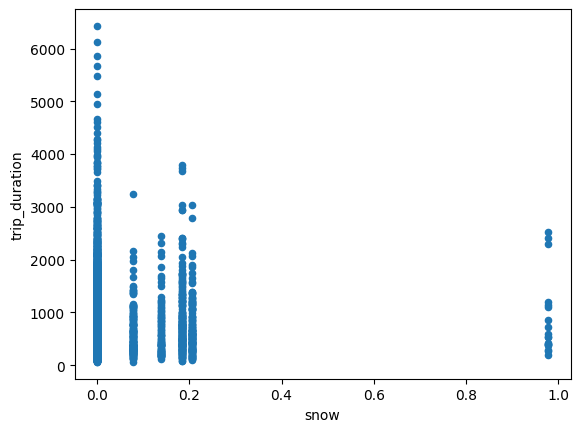

In [195]:
rides_merged.plot(kind="scatter", x="snow", y="trip_duration")

It appears there is no correlation between the appearance of snow on a particular day and the trip duration.